<a href="https://colab.research.google.com/github/Maverick29rus/homework/blob/master/%2215_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85%20%D0%B1%D1%83%D0%BA%D0%B2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Простые нейронные сети. Знакомство с библиотекой Keras](https://colab.research.google.com/drive/16xfRAdyg-Re1bP2cyYpbpAALa6noUL3U)
2. [Распознание рукописных цифр (Практика)](https://colab.research.google.com/drive/1RaGkCutdIazFN5PtQOod5UH2Cc05diYI)
3. Домашняя работа

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

Оценка за задание:
* 1 балл - задача решена с помощью куратора, точность на проверочной выборке ниже 85%
* 2 балла - задача решена с подсказками куратора, точность на проверочной выборке выше 85%
* 3 балла - задача решена самостоятельно, точность на проверочной выборке выше 85%
* 4 балла - задача решена самостоятельно, точность на проверочной выборке выше 93%
* 5 баллов - задача решена самостоятельно, точность на проверочной выборке выше 97%

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import models
from keras import layers
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
dataset.shape

(372451, 785)

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
(train_images, test_images, train_labels, test_labels) = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

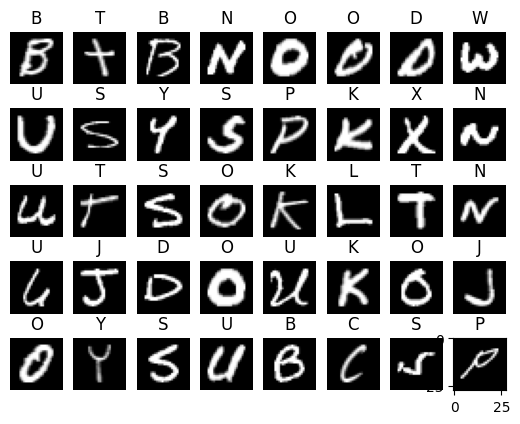

In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = train_images[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(train_labels[i]))
    im.imshow(x, cmap='gray')


In [ ]:
train_images.shape

(297960, 784)

In [ ]:
test_images.shape

(74491, 784)

In [ ]:
print(train_images[0][100:150])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.  73. 131. 145. 127. 128.
 149. 175. 232. 255. 247. 185.  33.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  19.]


In [ ]:
train_labels.shape

(297960,)

In [ ]:
print(train_labels)

[ 1. 19.  1. ... 13. 14. 13.]


## Подготовка данных

Перед обучением модели нам необходимо выполнить предварительную обработку данных, преобразовав их в форму, которую ожидает получить от нас нейронная сеть, и масштабировать их так, чтобы все значения оказались в интервале $[0, 1]$.

Исходные данные — обучающие изображения — хранятся в трехмерном массиве $(297960, 784)$ типа $uint8$, значениями в котором являются числа в интервале $[0, 255]$. Мы преобразуем его в массив $(297960, 784)$ типа $float32$ со значениями в интервале $[0, 1]$.

In [ ]:
# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
train_images = train_images.astype('float32') / 255

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels, len(word_dict)) # Кодируем обучающие метки на 26 классов
test_labels = to_categorical(test_labels, len(word_dict))   # Кодируем тестовые метки на 26 классов

In [ ]:
print(train_images[0][100:150])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05098039 0.28627452
 0.5137255  0.5686275  0.49803922 0.5019608  0.58431375 0.6862745
 0.9098039  1.         0.96862745 0.7254902  0.12941177 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07450981]


In [ ]:
print(train_labels)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Моделирование нейронной сети

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(len(word_dict), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Компиляция модели

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

## Обучение и оценка модели

In [ ]:
history = model.fit(train_images,
                    train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=8,
                    batch_size=128
                    )

Epoch 1/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9904 - val_loss: 0.0536
Epoch 2/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9898 - val_loss: 0.0584
Epoch 3/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9908 - val_loss: 0.0555
Epoch 4/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9913 - val_loss: 0.0571
Epoch 5/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9972 - loss: 0.0094 - val_accuracy: 0.9914 - val_loss: 0.0579
Epoch 6/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9976 - loss: 0.0077 - val_accuracy: 0.9917 - val_loss: 0.0599
Epoch 7/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9919 - val_loss: 0.0573
Epoch 8/8
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9981 - loss: 0.0067 - val_

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точность на тестовом образцу:', f'{round(test_acc*100, 2)} %')
print('Потери на тестовом образце:', f'{round(test_loss*100, 2)} %')

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9920 - loss: 0.0620
Точность на тестовом образцу: 99.27 %
Потери на тестовом образце: 5.88 %


### Предсказание

In [ ]:
# Выбор нужной картинки из тестовой выборки
n = 42
x = test_images[n]

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [ ]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 26 букв
print(f'Вектор результата на 26 выходных нейронах: \n {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознаная буква: {word_dict[pred]}')
print(f'Правильная буква: {word_dict[np.argmax(test_labels[n])]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Вектор результата на 26 выходных нейронах: 
 [[1.40738587e-16 3.80111942e-07 7.75246634e-14 4.37295910e-07
  9.08620266e-19 6.20604393e-12 6.48570548e-08 2.76392320e-20
  3.00177938e-12 3.72615772e-10 4.96660687e-21 5.12757510e-11
  6.88537993e-22 2.90831559e-19 5.15473471e-12 2.57080579e-09
  2.04415518e-13 7.72649558e-19 9.99884248e-01 8.71442319e-17
  5.79800035e-16 7.48862723e-13 2.94221231e-14 1.35846069e-17
  1.14954106e-04 1.43419195e-16]]
Распознаная буква: S
Правильная буква: S


### Визуализация процесса обучения

Построим график точности на этапах обучения и проверки:

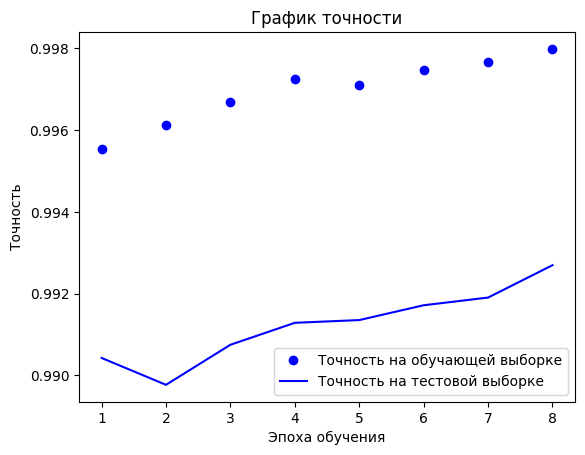

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

Вывод: Экспериментальным путем было выяснено, что оптимальная точность достигается на 8 эпохе. С дальнейшим увеличением эпох, точность на тестовой выборке перестает значительно расти. При этом точность на обучающей выборке продолжает расти, что может привести к переобучению.

Построим график потерь на этапах обучения и проверки:


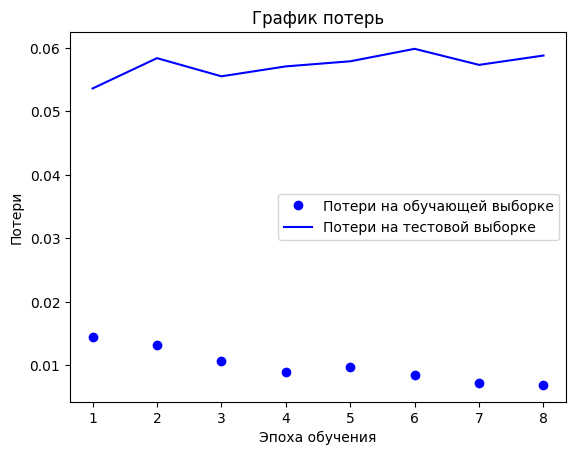

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

Вывод: по графику потерь видно, что потери на тестовой выборке после 3 эпохи практически не зависят от количества эпох.

Сделаем предсказание по всем тестовым данным

In [ ]:
prediction = model.predict(test_images)


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


Построим матрицу ошибок

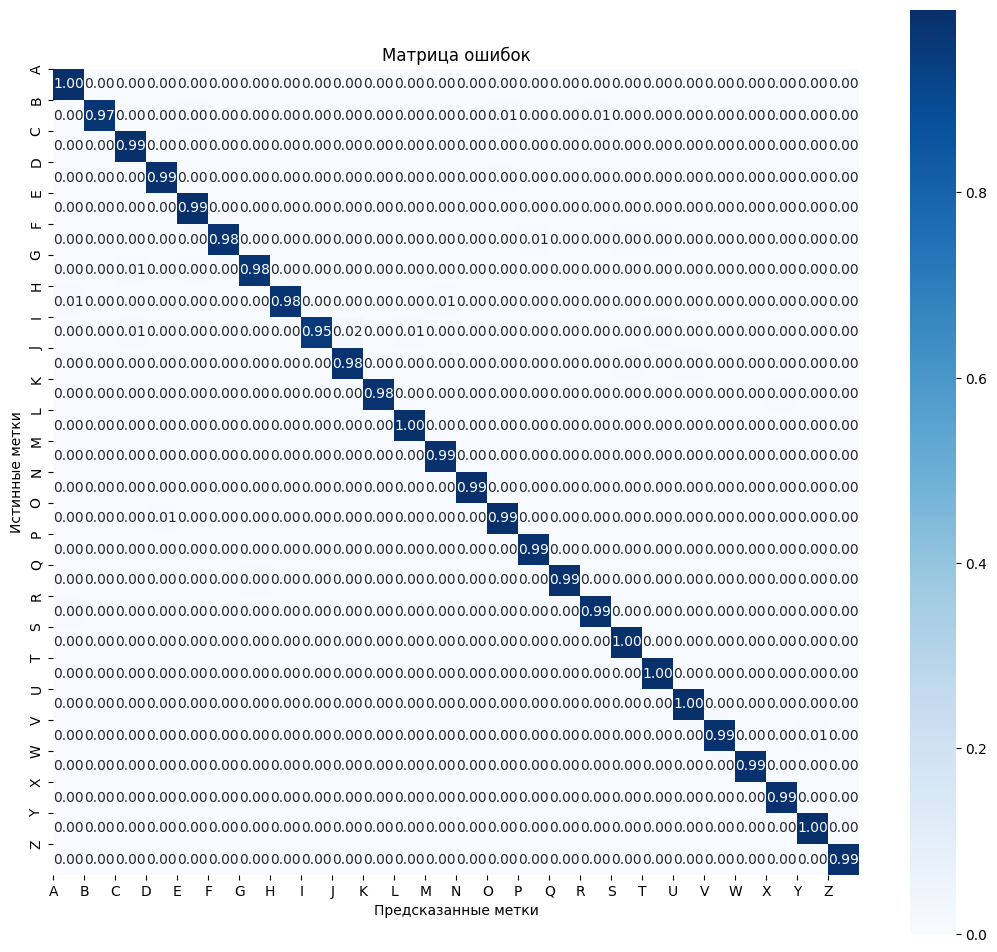

In [ ]:
def show_confusion_matrix(true_labels, pred_labels):
    # Вычисление матрицы ошибок и ее нормализация
    plt.figure(figsize=(13, 12))
    confusion = confusion_matrix(true_labels.argmax(axis=1),
                                 pred_labels.argmax(axis=1))
    confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)

    ax = sns.heatmap(confusion_normalized, cmap='Blues',
                     annot=True, fmt='.2f', square=True)
    ticks=list(word_dict.keys())
    labels=list(word_dict.values())
    plt.yticks(ticks=ticks, labels=labels)
    plt.xticks(ticks=ticks, labels=labels)
    plt.title("Матрица ошибок")
    plt.ylabel("Истинные метки")
    plt.xlabel("Предсказанные метки")


show_confusion_matrix(test_labels, prediction)

По матрице ошибок видно, что модель одинаково хорошо справляется со всеми метками данных.